In [18]:
import pandas as pd
food_orders = pd.read_csv('food_orders_new_delhi.csv')
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [19]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [20]:
food_orders.isna().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

## Data Cleaning and Preparation

In [21]:
import pandas as pd

# Convert “Order Date and Time” and “Delivery Date and Time” to datetime format
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])
display(food_orders.head())

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


### Working on Discounts

In [22]:
# Function to extract discount values
def extract_discount(discount_str):
    if pd.isna(discount_str): # as there exists NaN values
        return 0.0
    elif 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

# Apply the function to create a new 'Discount Value' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))
# food_orders['Discount Value'] = food_orders['Discounts and Offers'].apply(extract_discount)

def calculate_discount_amount(row):
    if row['Discount Percentage'] > 0:
        return row['Order Value'] * row['Discount Percentage'] / 100
    elif row['Discount Percentage'] < 0:
        return row['Discount Percentage']
    else:
        return 0.0

# Apply the calculation function to create a new 'Discount Amount' column
food_orders['Discount Amount'] = food_orders.apply(calculate_discount_amount, axis=1)
display(food_orders.head())

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


In [23]:
# food_orders['Discount Value'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))
# food_orders['Discount Value'] = food_orders['Discounts and Offers'].apply(extract_discount)

# These two methods are functionally equivalent. However, in these cases, the lambda function prevails:
# 1. Additional operations like:
# food_orders['Discount Value'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x) * 2)
# 2. Passing multiple arguments:
# food_orders['Discount Value'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x, 'off'))

## Cost and Profitability Analysis

In [24]:
# calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics = {
    'Total Orders': total_orders,
    'Total Revenue': total_revenue,
    'Total Costs': total_costs,
    'Total Profit': total_profit
}

overall_metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Costs': 232709.85,
 'Total Profit': -105719.85}

We observe a net loss due to high costs associated with the food delivery operations, meaning the rates are not sustainable. 

### Plotting to understand the distribution

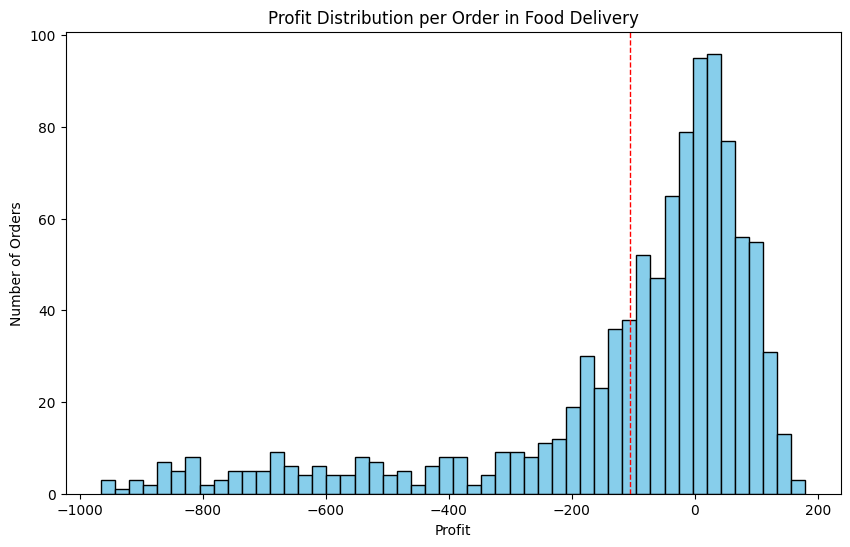

In [25]:
# 1. A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

Delivery Fee               28620.00
Payment Processing Fee     29832.00
Discount Amount           174257.85
dtype: float64

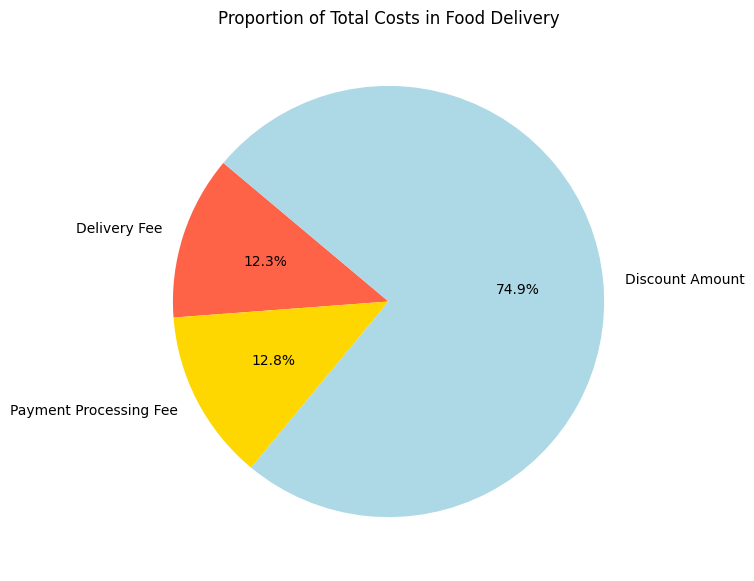

In [26]:
# 2. A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
import matplotlib.pyplot as plt

costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
display(costs_breakdown)
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue']) 
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

We observe that a big portion of the costs is Discounts, indicating that promotional strategies are not effective.

### Compare total revenue, total costs, and total profit

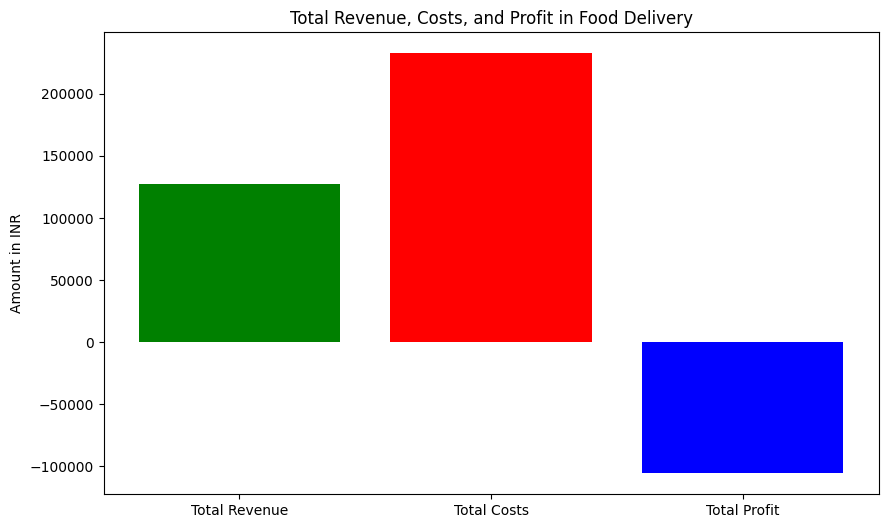

In [27]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(10, 6))
plt.bar(totals, values, color=['green', 'red', 'blue']) # bar(name, value, color)
plt.title('Total Revenue, Costs, and Profit in Food Delivery')
plt.ylabel('Amount in INR') # Indian Rupees
plt.show()

It visually shows that the costs surpass the revenue, leading to a net loss.

## New strategies
It seems like we need to find a sweet spot for charging commissions and offering discounts to stay profitable. Specifically, we look for:
1. A new average commission percentage based on profitable orders.
2. A new average discount percentage based on profitable orders.
Given these adjustments, they need to not only make individual orders profitable but also the overall business profitable.

### Calculate the average commission percentage for profitable orders

In [28]:
# profitable orders are filtered 
profitable_orders = food_orders[food_orders['Profit'] > 0]

# What is the average commision percentage for profitable orders?
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# What is the average discount percentage for profitable orders?
profitable_orders['Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# Calculate the new average commission percentage and discount percentage for profitable orders
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Discount Percentage'].mean()

new_avg_commission_percentage, new_avg_discount_percentage

/var/folders/8h/5hbggh8x0dsg9gx6tg9kyv100000gn/T/ipykernel_59959/2068947302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
/var/folders/8h/5hbggh8x0dsg9gx6tg9kyv100000gn/T/ipykernel_59959/2068947302.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


(30.508436145149435, 5.867469879518072)

Analyzing only profitable orders, we find a new set of averages representing the new strategy.
Of course, for profitable orders, the average commission percentage is higher than the original average, while the average discount percentage is lower.

### Simulate profitability with new strategies

In [29]:
# The recommended commission percentage and discount percentage (we round them manually to ingeger values for simplicity)
recommended_commission_percentage = 30.0
recommended_discount_percentage = 6.0

# Calculate the simulated commission fee and discount amount based on the recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * recommended_commission_percentage / 100
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * recommended_discount_percentage / 100

# Recalculate the total costs and profit based on the simulated commission fee and discount amount
food_orders['Simulated Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Simulated Discount Amount']
food_orders['Simulated Profit'] = food_orders['Simulated Commission Fee'] - food_orders['Simulated Total Costs']

food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Simulated Commission Fee,Simulated Discount Amount,Simulated Total Costs,Simulated Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,0,5.0,95.70,142.70,150,7.30,574.2,114.84,161.84,412.36
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,0,10.0,98.60,161.60,198,36.40,295.8,59.16,122.16,173.64
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,0,15.0,140.55,215.55,195,-20.55,281.1,56.22,131.22,149.88
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,...,0,0.0,0.00,77.00,146,69.00,438.9,87.78,164.78,274.12
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,0,50.0,996.00,1076.00,130,-946.00,597.6,119.52,199.52,398.08


/Users/jihuazhang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jihuazhang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


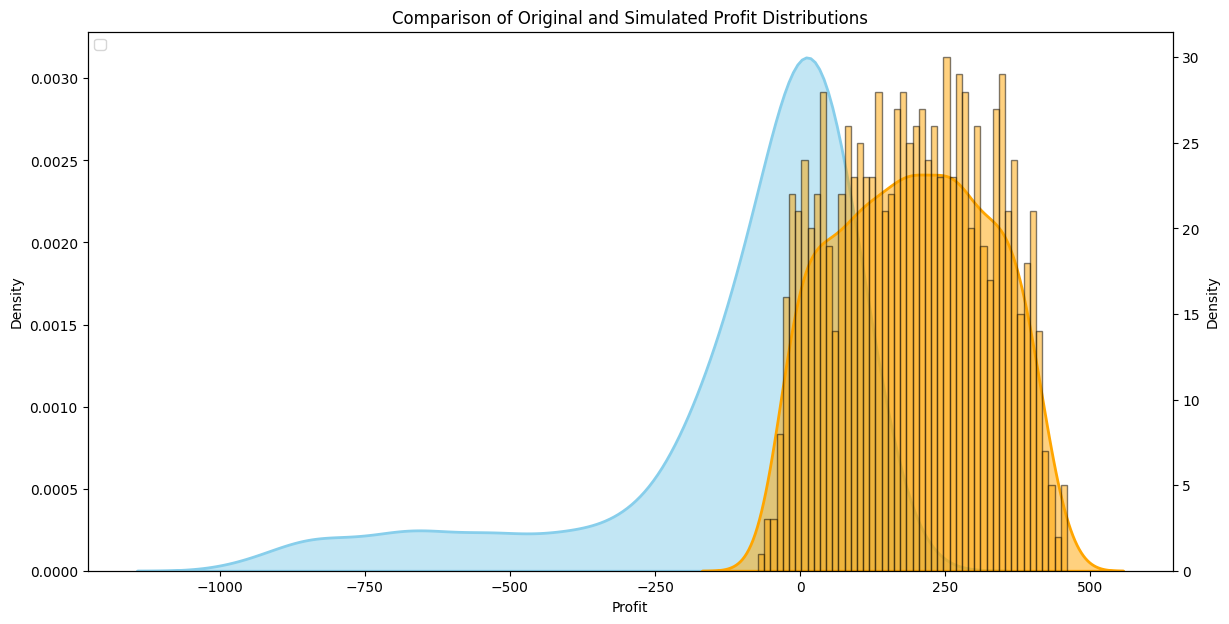

In [36]:
# Then we visualize the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# Plotting the original profit distribution
sns.kdeplot(food_orders['Profit'], color='skyblue', label='Original Profit Distribution', fill=True, alpha=0.5, linewidth=2)

# Plotting the simulated profit distribution
sns.kdeplot(food_orders['Simulated Profit'], color='orange', label='Simulated Profit Distribution', fill=True, alpha=0.5, linewidth=2)
# Create a histogram for the simulated profit distribution in the same plot
# Create a secondary y-axis for the histogram
ax2 = plt.gca().twinx()
ax2.hist(food_orders['Simulated Profit'], bins=50, color='orange', alpha=0.5, edgecolor='black')

plt.title('Comparison of Original and Simulated Profit Distributions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc = 'upper left')
plt.show()

### Interpretation
A significant portion of orders in the original strategy is unprofitable. The new strategy aims to increase the profitability of individual orders, which will lead to a profitable business overall.

## Summary
We need to first conduct Cost and Profitability Analysis to understand the current situation, figuring out whether the net loss is due to high costs or low revenue by calculating and visualizing our data. 
Then, we analyze only the profitable ones to find a new set of averages as our benchmarks representing the new strategy. 
Finally, we simulate the profitability with the new strategies to understand the potential impact on the business.